In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#dataset retrieval 
data= pd.read_csv('titanic.csv')

In [8]:
data.info()
#in this we can see that survived is the dependent variable and sex, age, class,name etc are independent variables. also object types are characters and float types are integers or numbers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [9]:
data.head()
#we see that survived, Pclass, sibling/spouse aboard are discrete variables where as age and Fare are continuous variables. 

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
Survived : Passenger who survived(1) or died(0)
Pclass : Passenger class
Name : Name of Passenger
Sex : Gender of passenger
Age : Age of passenger
Sib_Sp : Number of siblings or spouses
Par_ch : Number of parents or children
Ticket : Ticket number
Fare : Amount of money spend on ticket

In [70]:
data.rename(columns = {'Siblings/Spouses Aboard': 'sib_sp', 'Parents/Children Aboard': 'Par_ch'}, inplace=True)

In [71]:
data.head()

,Survived,Pclass,Name,Sex,Age,sib_sp,Par_ch,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [10]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [14]:
#this is a binary classification problem
data.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [16]:
#finding null values
data.isnull().sum()
#there are no null values

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [17]:
#Lets see the correlatiob between the variables
cor= data.corr()
print(cor)

                         Survived    Pclass       Age  \
Survived                 1.000000 -0.336528 -0.059665   
Pclass                  -0.336528  1.000000 -0.391492   
Age                     -0.059665 -0.391492  1.000000   
Siblings/Spouses Aboard -0.037082  0.085026 -0.297669   
Parents/Children Aboard  0.080097  0.020252 -0.193741   
Fare                     0.256179 -0.548919  0.112329   

                         Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived                               -0.037082                 0.080097   
Pclass                                  0.085026                 0.020252   
Age                                    -0.297669                -0.193741   
Siblings/Spouses Aboard                 1.000000                 0.414244   
Parents/Children Aboard                 0.414244                 1.000000   
Fare                                    0.158839                 0.215470   

                             Fare  
Survived                

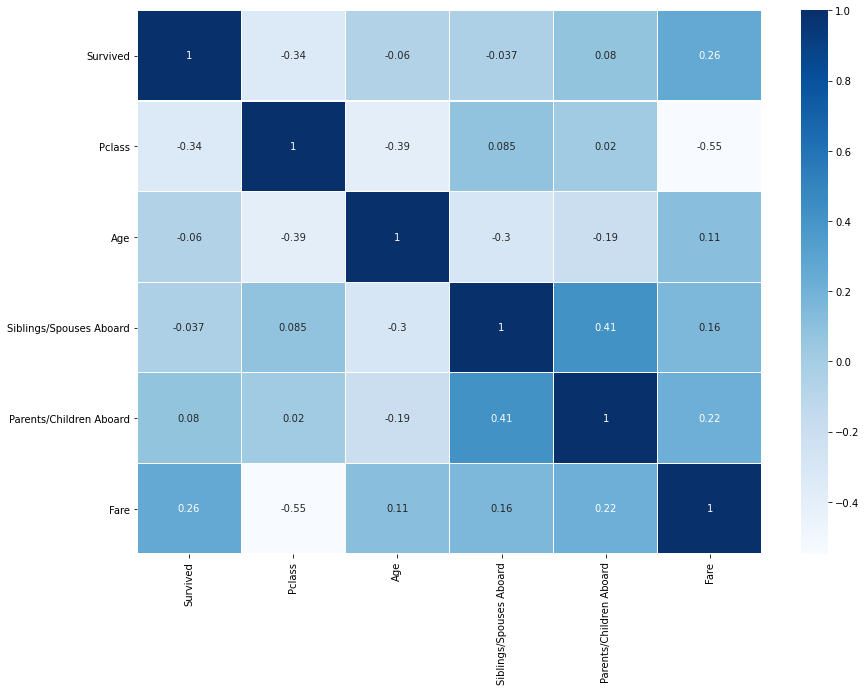

In [18]:
#corr using heatmaps
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), cmap=colormap, annot=True, linewidths=0.2)
#there is negative strong correlation between fare and pclass

## Univariate analysis

In [19]:
data.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [74]:
data.sib_sp.value_counts()

0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: sib_sp, dtype: int64

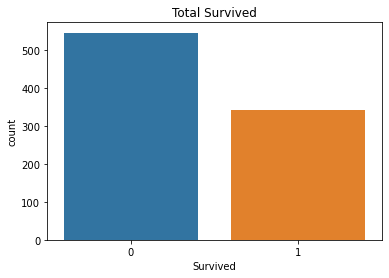

In [22]:
sns.countplot('Survived', data=data)
plt.title("Total Survived")
plt.show()

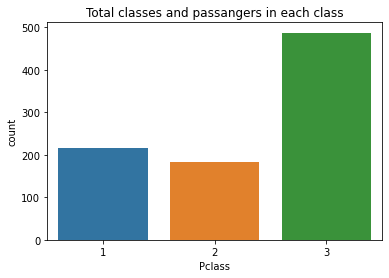

In [55]:
#lets perform univariate analysis on some more variables
sns.countplot('Pclass', data=data)
plt.title("Total classes and passangers in each class")
plt.show()

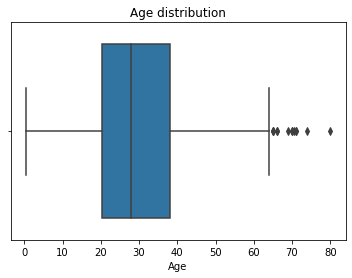

In [25]:
#as Pclass, survived are discrete varaibles we can use countplots for them. Lets look at the continuous variables
sns.boxplot('Age', data=data)
plt.title("Age distribution")
plt.show()
#We can see that there are some people with ages more than the average range of ages which is 20-40

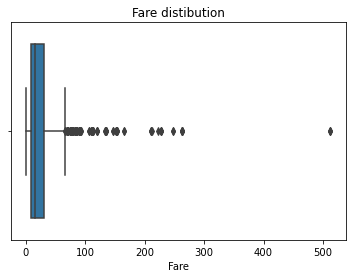

In [26]:
sns.boxplot('Fare', data=data)
plt.title("Fare distibution")
plt.show()

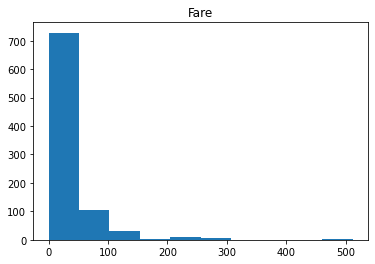

In [30]:
plt.hist('Fare', data=data)
plt.title("Fare")
plt.show()
#maximum no of people had fare btw 0-50

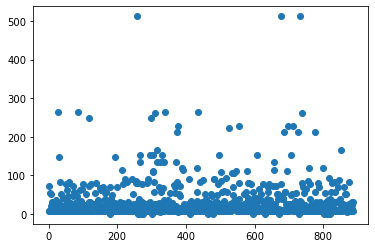

In [32]:
#lets see the distirbution using a scatterplot
plt.scatter(data.index, data['Fare'])
plt.show()
#we can totally see that there are some passengers that paid a lot of fare compared to the averge, we can call them outliers. 

(array([573.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

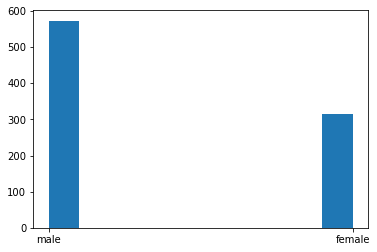

In [33]:
#lets look at ctaegorical varaible
plt.hist(data['Sex'])

## Bivariate analysis

In [35]:
#Categorical vs categorical
data.groupby(['Pclass', 'Survived'])['Survived'].count()
#136 in 1st class survived
#87 in 2nd
#119 in 3rd

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           368
        1           119
Name: Survived, dtype: int64

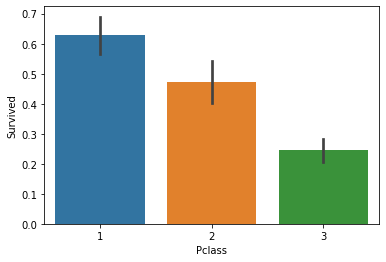

In [61]:
#survival vs plcass
sns.barplot(x='Pclass', y='Survived', data=data)
#More people in class 3 survived as compared to class 2 and 1

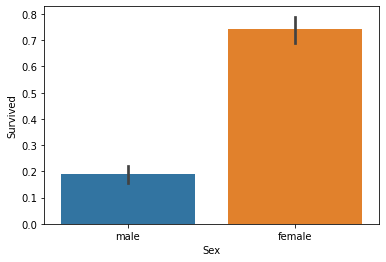

In [64]:
#survival vs sex
sns.barplot(x='Sex', y='Survived', data=data)
#more females survived as compared to males.

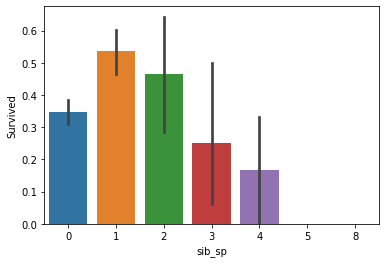

In [72]:
#sib_sp vs survived
sns.barplot(x='sib_sp', y='Survived', data=data)
#people with only 1 or 2 sibling/spouse had greater chances of survival

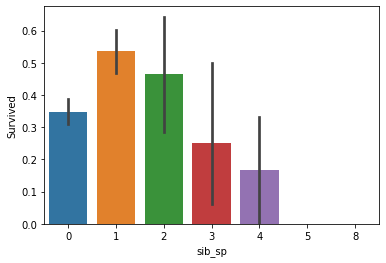

In [75]:
#par_ch vs survived
sns.barplot(x='sib_sp', y='Survived', data=data)
#no of parent/child==1 has more chances of survival 

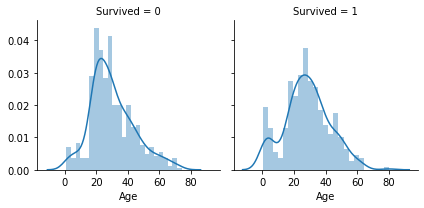

In [78]:
#categorical vs continuous 
#age vs survived
g = sns.FacetGrid(data, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()
#large no of 20-40 years did not survive
#middle ages between 20-40 survived more
#comparitively more no of 20-40 range people dided 
#80+ people survived

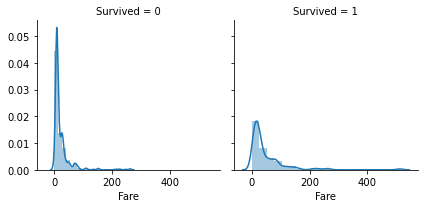

In [79]:
#survived vs fare
g = sns.FacetGrid(data, col = "Survived")
g.map(sns.distplot, "Fare", bins = 20)
plt.show()

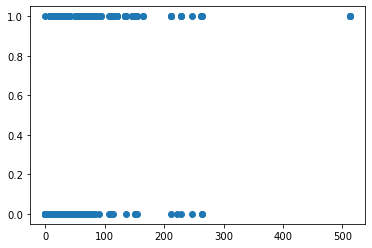

In [84]:
plt.scatter(data['Fare'], data['Survived'])
plt.show()
#There is no correclation between fare and survived

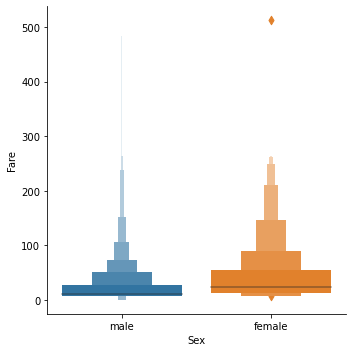

In [44]:
#sex and fare
sns.catplot(x='Sex', y='Fare', data=data, kind='boxen')
#we see that fare of females on average is greater than that of men

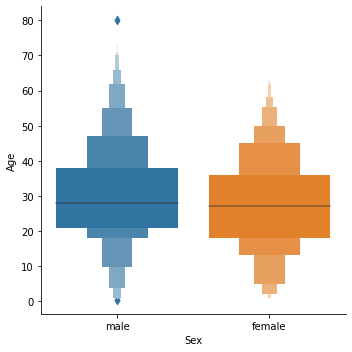

In [85]:
#sex and Age
sns.catplot(x='Sex', y='Age', data=data, kind='boxen')
#The average age of men is greater than the average age of women
#There were only men on the ship above the age 0f 70

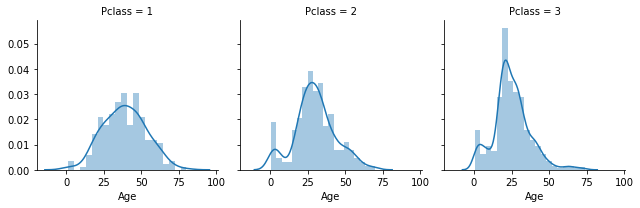

In [90]:
#Pclass vs age
g = sns.FacetGrid(data, col = "Pclass")
g.map(sns.distplot, "Age", bins = 20)
plt.show()
#Pclass 3 has more passengers at the age of 20-30 then Pclass 2 and then pclass 1.

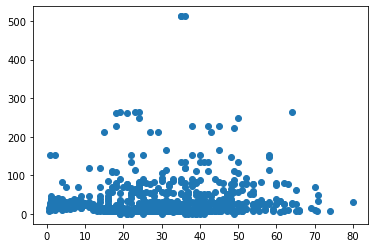

In [91]:
#Continuous vs continuous
#AGE VS FARE
plt.scatter(x= data['Age'], y=data['Fare'])
plt.show()
#people between the age of 20 to 7-0 were able to pay high Fare price

## Multi variate analysis

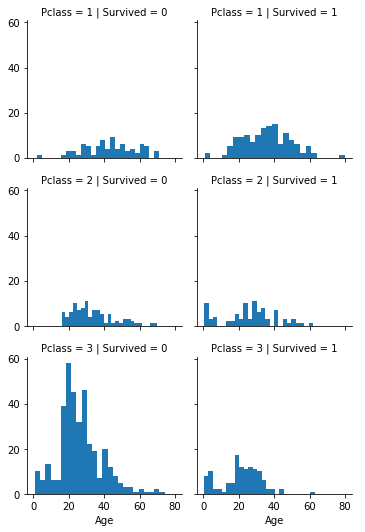

In [93]:
#Pclass vs Survived vs Age
g = sns.FacetGrid(data, col = "Survived", row = "Pclass", height = 2.5)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()
#alot of people from age 20-30 in Pclass 3 did not survive
#Max people that survived were in pclass2 
#Pclass is crucial feature in modeling 

C:\Users\prake\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\prake\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


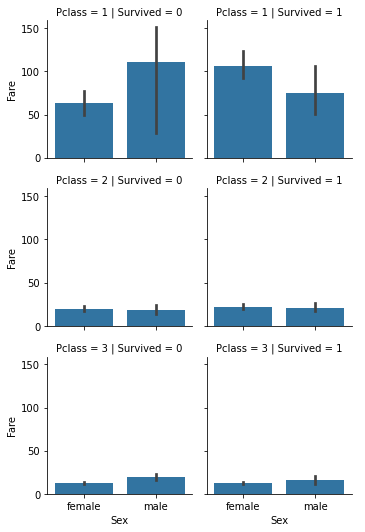

In [95]:
#Pclass vs Sex vs Fare vs Survived
g = sns.FacetGrid(data, row = "Pclass", col = "Survived", size = 2.5)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()
#alot of men from pclass 1 that paid high fares died  more than any other class
#women in pclass1 that paid more fair had greater survival rate.

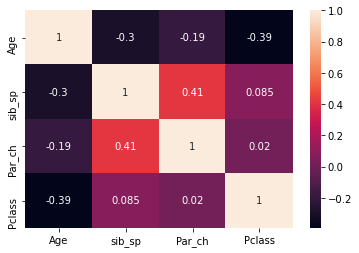

In [98]:
sns.heatmap(data[["Age","Sex","sib_sp","Par_ch","Pclass"]].corr(), annot = True)
plt.show()
#Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [108]:
#Data preprocessing
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [123]:
# Separating features and targets
X_train = data.drop(['Survived','Name'],axis=1)
y_train = data['Survived']

X_test = data.drop(['Name'],axis=1)

In [124]:
encoder = OrdinalEncoder()
encoder_train = pd.DataFrame(encoder.fit_transform(X_train[['Sex']]),columns=['Sex'])
encoder_test = pd.DataFrame(encoder.transform(X_test[['Sex']]),columns=['Sex'])

X_train = pd.concat([X_train.drop(['Sex'],axis=1),encoder_train],axis=1)
X_test = pd.concat([X_test.drop(['Sex'],axis=1),encoder_test],axis=1)
#encoding is important as sex variable doesnt have a float value

In [113]:
feature_columns = [col for col in X_train.columns]

In [125]:
rfc = RandomForestClassifier(n_estimators = 100,max_depth=8,random_state=0)
#Fitting on final model
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [126]:
y_pred_train = rfc.predict(X_train)

In [127]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [128]:
# Classification Report on train data set
print('Classification Report on Train Data','\n\n',classification_report(y_train,y_pred_train))

Classification Report on Train Data 

               precision    recall  f1-score   support

           0       0.90      0.96      0.93       545
           1       0.93      0.83      0.88       342

    accuracy                           0.91       887
   macro avg       0.91      0.90      0.90       887
weighted avg       0.91      0.91      0.91       887

